# Image Classification using Derment Dataset - Data Cleaning



## Context
The data consists of images of 23 types of skin diseases taken from http://www.dermnet.com/dermatology-pictures-skin-disease-pictures. The total number of images are around 19,500, out of which approximately 15,500 have been split in the training set and the remaining in the test set.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

file_path = "/content/drive/MyDrive/Derment/Images"

## 1. Dataset Analysis

In [ ]:
for folder_name in os.listdir(file_path):
    counter = 0
    for file in os.listdir(file_path + "/" + folder_name):
        counter += 1
    print("There are total {} number of class present in {} folder.".format(counter,folder_name))

There are total 23 number of class present in test folder.
There are total 23 number of class present in train folder.


In [ ]:
print("The class names are:\n")
for folder_name in os.listdir(file_path):
    for file in os.listdir(file_path + "/" +folder_name):
        print(file)
    break

The class names are:

Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions
Acne and Rosacea Photos
Bullous Disease Photos
Cellulitis Impetigo and other Bacterial Infections
Atopic Dermatitis Photos
Herpes HPV and other STDs Photos
Eczema Photos
Lupus and other Connective Tissue diseases
Exanthems and Drug Eruptions
Melanoma Skin Cancer Nevi and Moles
Light Diseases and Disorders of Pigmentation
Hair Loss Photos Alopecia and other Hair Diseases
Scabies Lyme Disease and other Infestations and Bites
Poison Ivy Photos and other Contact Dermatitis
Nail Fungus and other Nail Disease
Psoriasis pictures Lichen Planus and related diseases
Systemic Disease
Seborrheic Keratoses and other Benign Tumors
Vascular Tumors
Tinea Ringworm Candidiasis and other Fungal Infections
Urticaria Hives
Vasculitis Photos
Warts Molluscum and other Viral Infections


## 2. Image Analysis

* I have made a dataframe of each image by labeling there class.

### 2.1 Dataframe Generation



In [ ]:
def csv_generator(filepath, name):
    """
    This function generates a csv file by taking input as filepath.
    input:
    ------
        filepath : path where folder is present
        name : name of the output csv file
    return:
    -------
        dataframe
    """
    #creating emoty dataframe
    df = pd.DataFrame()
    #initializing list to append filename and classes
    image_path = list(); classes = list(); image_name = list()
    for folder in os.listdir(filepath):
        for file in os.listdir(filepath+"/"+folder):
            image_path.append(filepath + "/" + folder + "/"); classes.append(folder); image_name.append(file)
    #mapping files into the empty dataframe
    df["image_path"] = pd.Series(image_path); df["image_name"] =  pd.Series(image_name); df["class"] = pd.Series(classes)
    #saving into a csv file
    df.to_csv(name, index=False)
    return df

In [ ]:
train_path = file_path + "/train" ; test_path = file_path + "/test"
train_df = csv_generator(train_path, "train_df.csv")
test_df = csv_generator(test_path, "test_df.csv")

In [ ]:
print("Shape of training dataset is {}.".format(train_df.shape))
print("Shape of test dataset is {}.".format(test_df.shape))

Shape of training dataset is (15557, 3).
Shape of test dataset is (4002, 3).


In [ ]:
#data manipulation
train_df.head(2)

image_path  ...                    class
0  /content/drive/MyDrive/Derment/Images/train/Ac...  ...  Acne and Rosacea Photos
1  /content/drive/MyDrive/Derment/Images/train/Ac...  ...  Acne and Rosacea Photos

[2 rows x 3 columns]

* The dataset contains 2 features. 1-path of the image and corressponding label.

In [ ]:
test_df.head(2)

image_path  ...                                              class
0  /content/drive/MyDrive/Derment/Images/test/Act...  ...  Actinic Keratosis Basal Cell Carcinoma and oth...
1  /content/drive/MyDrive/Derment/Images/test/Act...  ...  Actinic Keratosis Basal Cell Carcinoma and oth...

[2 rows x 3 columns]

### 2.2 Target Label Analysis

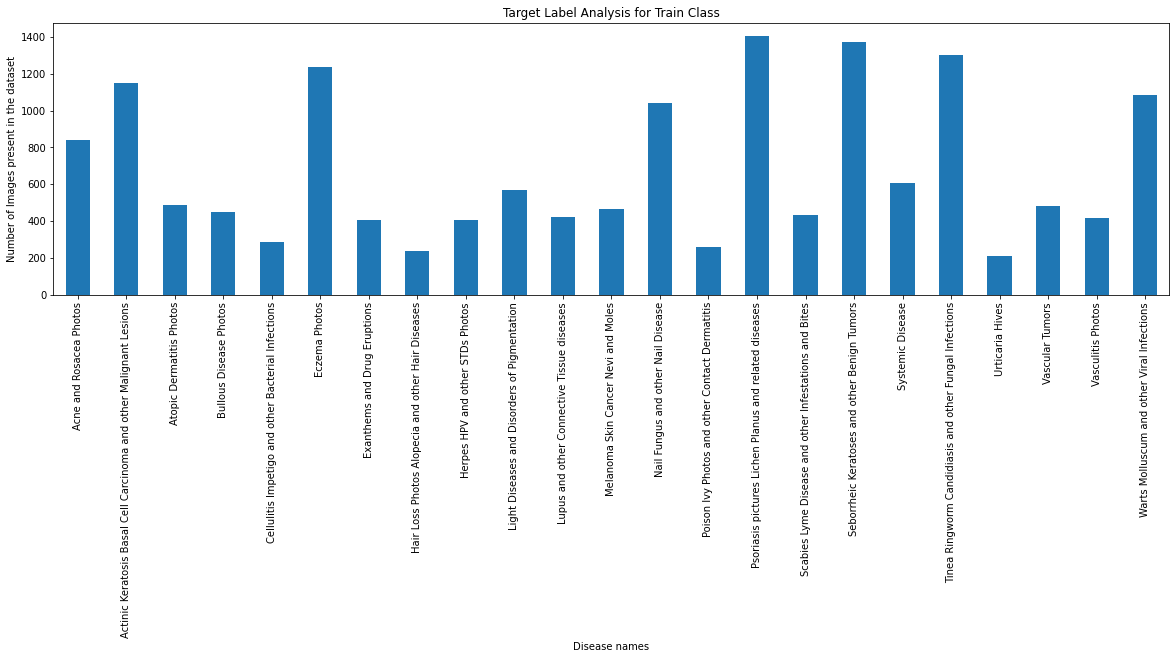

In [ ]:
#getting the frequncy of each label
train_plot = train_df["class"].value_counts().sort_index().plot(kind="bar", 
                                                                xlabel="Disease names",
                                                                ylabel="Number of Images present in the dataset", 
                                                                title="Target Label Analysis for Train Class",
                                                                figsize = (20,5))
plt.show()

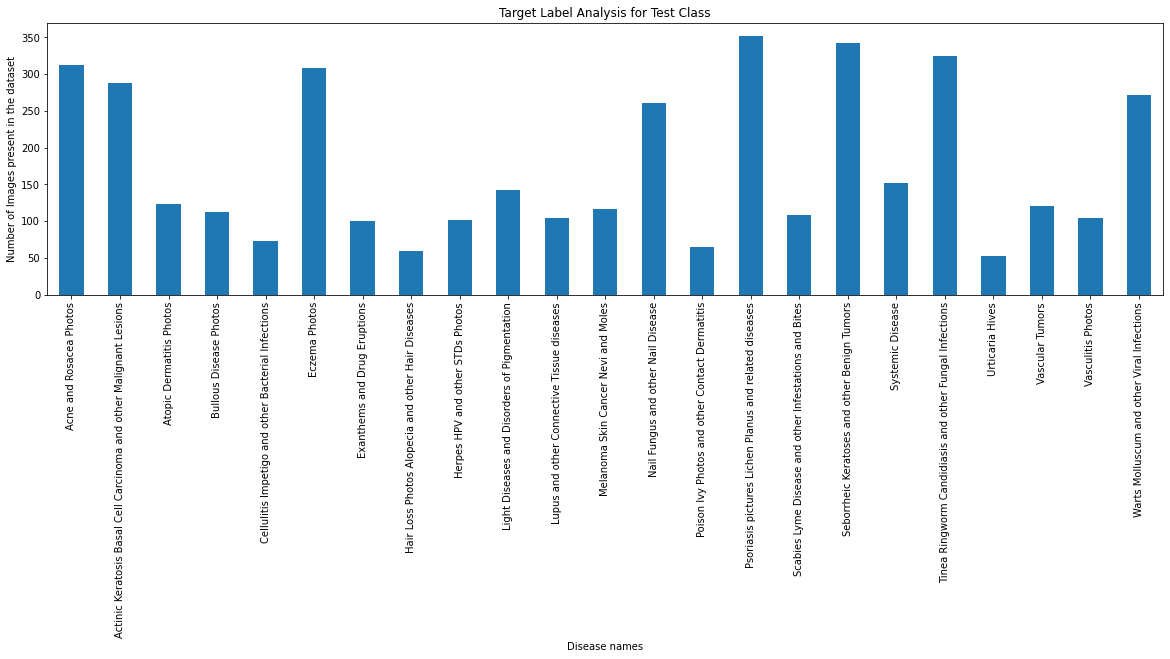

In [ ]:
#getting the frequncy of each label
test_plot = test_df["class"].value_counts().sort_index().plot(kind="bar", 
                                                              xlabel="Disease names",
                                                              ylabel="Number of Images present in the dataset", 
                                                              title="Target Label Analysis for Test Class",
                                                              figsize = (20,5))
plt.show()

In [ ]:
train_df["class"].value_counts()

Psoriasis pictures Lichen Planus and related diseases                 1405
Seborrheic Keratoses and other Benign Tumors                          1371
Tinea Ringworm Candidiasis and other Fungal Infections                1300
Eczema Photos                                                         1235
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions    1149
Warts Molluscum and other Viral Infections                            1086
Nail Fungus and other Nail Disease                                    1040
Acne and Rosacea Photos                                                840
Systemic Disease                                                       606
Light Diseases and Disorders of Pigmentation                           568
Atopic Dermatitis Photos                                               489
Vascular Tumors                                                        482
Melanoma Skin Cancer Nevi and Moles                                    463
Bullous Disease Photos   

#### Observations:

* The dataset contains imbalance class.
* The disease which has minimum images are "Urticaria Hives" which has only 212 images, where as maximum images are present in "Psoriasis pictures Lichen Planus and related diseases" class which has 1405 images.


### 2.3 Duplicate Image - class wise

In [ ]:
def duplicate_pictures(df, ImageName, name=None):
    """
    This function takes image name as inputr and provides us the duplicate class with printing the images.
    """
    col = 2 
    fig, ax = plt.subplots(ncols=col, figsize=(15,5))
    classes = ["train", "test"]
    #iterating to print images
    for val in range(0,col):
        dup_path = df[df["image_name"] == ImageName][["image_path","image_name"]].sum(axis=1).values[val]
        class_name = df[df["image_name"] == ImageName]["class"].values[val]

        img_color = cv2.imread(dup_path, cv2.IMREAD_COLOR)
        img_color_resized = cv2.resize(img_color, (256, 100), interpolation = cv2.INTER_NEAREST)
        
        ax[val].imshow(img_color_resized, interpolation='nearest')

        if name == "different class":
            ax[val].set_title("Image found in " + str(classes[val]) + " " + str(class_name), fontsize=15)
        else:
            ax[val].set_title("Image found in " + str(class_name), fontsize=15)

    return plt.show()

In [ ]:
#by checking with names
print("Number of duplicate images present in the train dataset is {}.".format(len(train_df[train_df.duplicated(subset=["image_name"])])))
train_df[train_df.duplicated(subset=["image_name"])].tail(2)

Number of duplicate images present in the train dataset is 280.


image_path  ...                                       class
15463  /content/drive/MyDrive/Derment/Images/train/Wa...  ...  Warts Molluscum and other Viral Infections
15466  /content/drive/MyDrive/Derment/Images/train/Wa...  ...  Warts Molluscum and other Viral Infections

[2 rows x 3 columns]

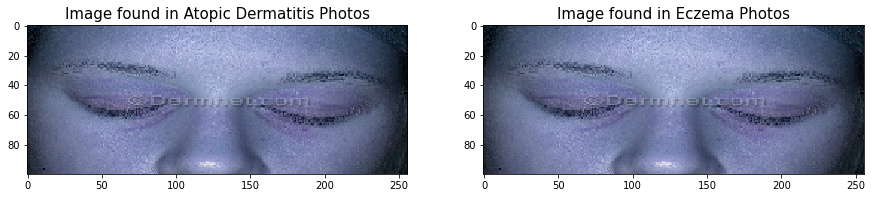

None


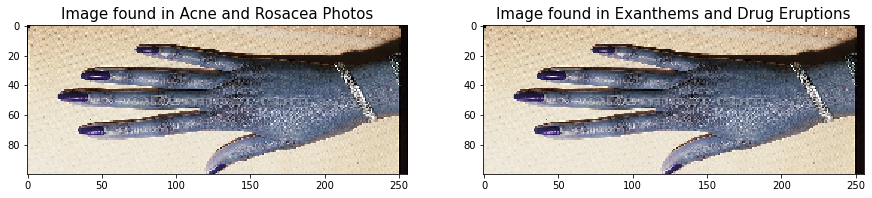

None


In [ ]:
print(duplicate_pictures(train_df, "03DermatitisLids.jpg", ))
print(duplicate_pictures(train_df, "minocycline-pigmentation-10.jpg", ))

In [ ]:
#by checking with names
print("Number of duplicate images present in the test dataset is {}.".format(len(test_df[test_df.duplicated(subset=["image_name"])])))
test_df[test_df.duplicated(subset=["image_name"])].head(2)

Number of duplicate images present in the test dataset is 26.


image_path  ...          class
1026  /content/drive/MyDrive/Derment/Images/test/Ecz...  ...  Eczema Photos
1154  /content/drive/MyDrive/Derment/Images/test/Ecz...  ...  Eczema Photos

[2 rows x 3 columns]

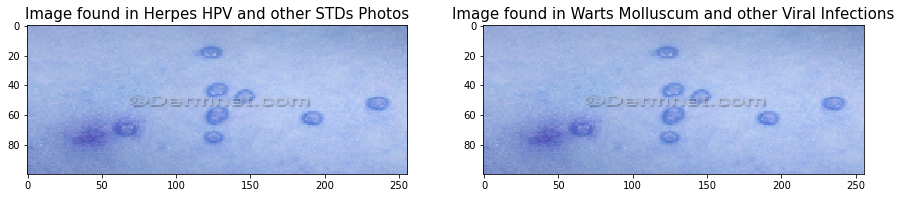

None


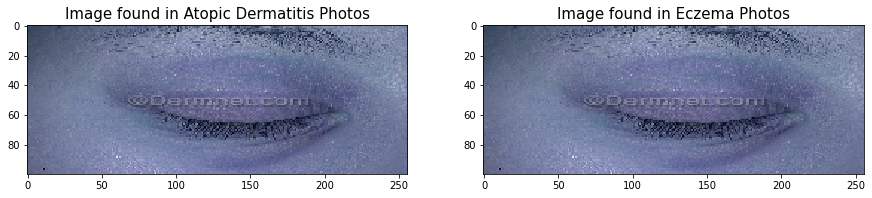

None


In [ ]:
print(duplicate_pictures(test_df, "molluscum-contagiosum-154.jpg", ))
print(duplicate_pictures(test_df, "03DermatitisLids1.jpg", ))

* As the number of duplicate rows are very less, also due to lack of domain knowledge about image class, we must keep only non-duplicated rows.

In [ ]:
#train and test - keep only non_duplicate rows
train_df_m1 = train_df[~train_df.duplicated(subset=["image_name"])]
test_df_m1 = test_df[~test_df.duplicated(subset=["image_name"])]

In [ ]:
print("Shape of training dataset after removal of duplicate values are {}.".format(train_df_m1.shape))
print("Shape of test dataset after removal of duplicate values are {}.".format(test_df_m1.shape))

Shape of training dataset after removal of duplicate values are (15277, 3).
Shape of test dataset after removal of duplicate values are (3976, 3).


### 2.4 Data present in different class

#### 2.4.1 Lichen-Planus Images are present in the Nail Fungus Dataset

In [ ]:
#from the manual check i found that lichen image is present in the Nail Fungus disease. 
#Lichen-planus is bot related to the Nail Fungus and we should remove that.
lichen_name_train = [name for name in train_df_m1[train_df_m1["class"] == "Nail Fungus and other Nail Disease"]["image_name"].values if "lichen" in name]
print(lichen_name_train[0:2])

lichen_name_test = [name for name in test_df_m1[test_df_m1["class"] == "Nail Fungus and other Nail Disease"]["image_name"].values if "lichen" in name]
print(lichen_name_test[0:2])

['lichen-planus-196.jpg', 'lichen-planus-142.jpg']
['lichen-planus-87.jpg', 'lichen-planus-205.jpg']


In [ ]:
image_name_for_nail_train = train_df_m1[train_df_m1["class"] == "Nail Fungus and other Nail Disease"]["image_name"].values 
#iterating images to remove lichen from Nail Fungus class
for name in image_name_for_nail_train:
    if name in lichen_name_train:
        train_df_m1 = train_df_m1[train_df_m1["image_name"] != name]

image_name_for_nail_test = test_df_m1[test_df_m1["class"] == "Nail Fungus and other Nail Disease"]["image_name"].values 
#iterating images to remove lichen from Nail Fungus class
for name in image_name_for_nail_test:
    if name in lichen_name_test:
        test_df_m1 = test_df_m1[test_df_m1["image_name"] != name]

In [ ]:
print("Shape of training dataset after removal of duplicate values are {}.".format(train_df_m1.shape))
print("Shape of test dataset after removal of duplicate values are {}.".format(test_df_m1.shape))

Shape of training dataset after removal of duplicate values are (15176, 3).
Shape of test dataset after removal of duplicate values are (3954, 3).


### 2.5 Duplicate Image - Combining train and test

In [ ]:
#combining both the class
final_df = pd.concat([train_df_m1, test_df_m1], axis=0)
#getting the duplicate images
duplicate_df = final_df[final_df.duplicated(subset=["image_name"], keep="first")]
print("The number of duplicate rows present in test dataset by taking images of training is {}.".format(duplicate_df.shape[0]))

The number of duplicate rows present in test dataset by taking images of training is 362.


In [ ]:
# getting the class combination to check how the duplicate images distributed
df_temp = pd.DataFrame()
df_temp["class_combination"] = [(train_df_m1[train_df_m1["image_name"] == i]["class"].values[0], test_df_m1[test_df_m1["image_name"] == i]["class"].values[0]) for i in duplicate_df["image_name"].values]
df_temp["image_name"] = [i for i in duplicate_df["image_name"].values]
#getting the counts
df_temp["class_combination"].value_counts()           

(Acne and Rosacea Photos, Acne and Rosacea Photos)                                                              270
(Hair Loss Photos Alopecia and other Hair Diseases, Nail Fungus and other Nail Disease)                          19
(Herpes HPV and other STDs Photos, Warts Molluscum and other Viral Infections)                                   18
(Warts Molluscum and other Viral Infections, Herpes HPV and other STDs Photos)                                   16
(Nail Fungus and other Nail Disease, Hair Loss Photos Alopecia and other Hair Diseases)                          14
(Eczema Photos, Tinea Ringworm Candidiasis and other Fungal Infections)                                           4
(Tinea Ringworm Candidiasis and other Fungal Infections, Eczema Photos)                                           4
(Acne and Rosacea Photos, Light Diseases and Disorders of Pigmentation)                                           3
(Nail Fungus and other Nail Disease, Eczema Photos)                     

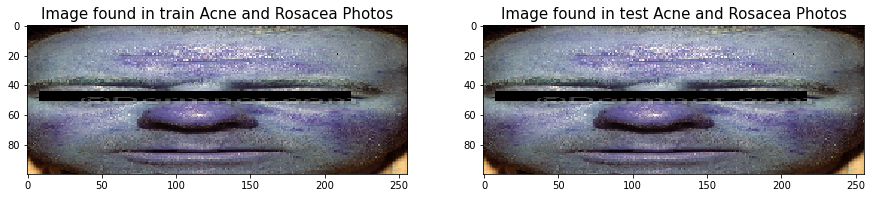

None


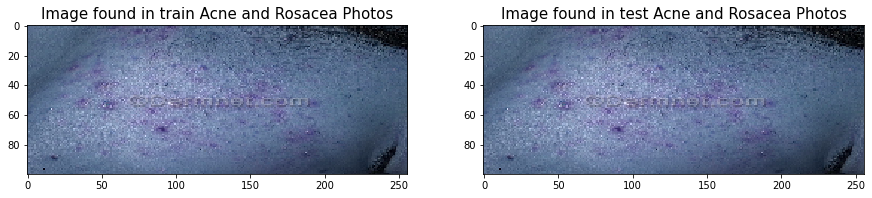

None


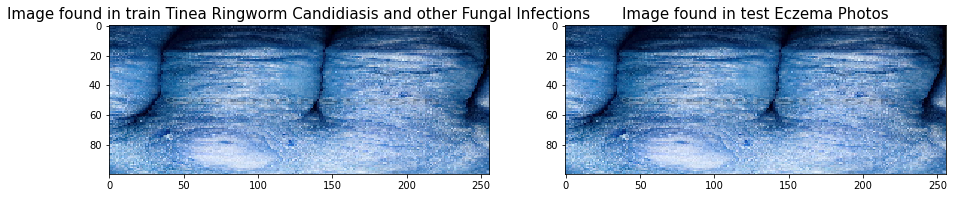

None


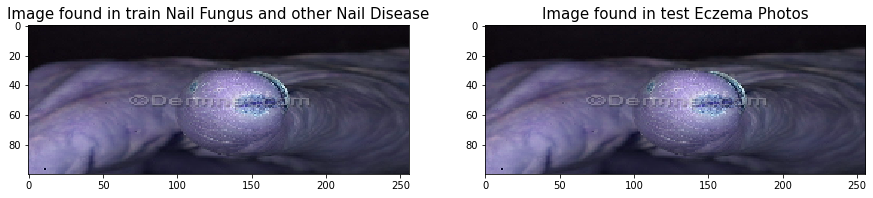

None


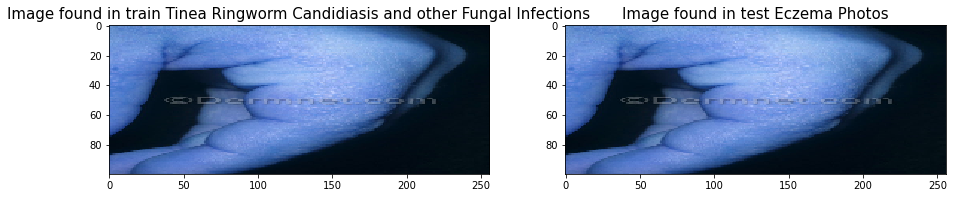

None


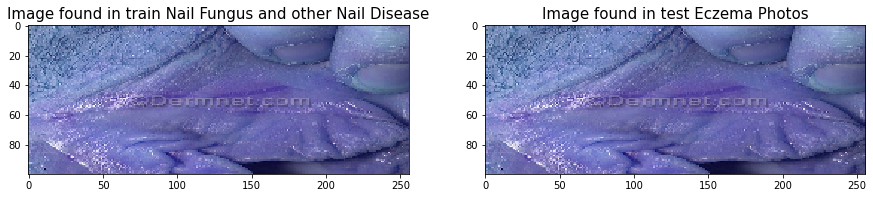

None


In [ ]:
for val in duplicate_df["image_name"].values[0:2]:
    print(duplicate_pictures(final_df, val, name="different class"))

for val in duplicate_df["image_name"].values[290:294]:
    print(duplicate_pictures(final_df, val, name="different class"))

* As we can see above 270 images are present in the same class. Otherwise rest are present in the different different folders.

#### Anomaly:
Hair disease related images are present in the nail related disease. 

Due to lack of domain knowledge we must keep only non duplicate data points.

In [ ]:
for val in duplicate_df["image_name"].values:
    train_df_m1 = train_df_m1[train_df_m1['image_name'] != val]
    test_df_m1 = test_df_m1[test_df_m1['image_name'] != val]

In [ ]:
print("Shape of training dataset after removal of duplicate values are {}.".format(train_df_m1.shape))
print("Shape of test dataset after removal of duplicate values are {}.".format(test_df_m1.shape))

Shape of training dataset after removal of duplicate values are (14814, 3).
Shape of test dataset after removal of duplicate values are (3592, 3).


#### Conclusion:

We can see that the class having higher number of images are highly diverse.

### 2.6 Anomalies

* I found some of the images which is not relevent from the dataset prospective. 
* I made a list of all potential images as shown below by checking manually.
* I have created a list and appended all into a pickle file.

In [ ]:
def multiplot(col, row, samples_to_print):
    """
    This function plots multiple plot of a class.
    """
    fig, ax = plt.subplots(nrows=row, ncols=col, figsize=(20,20))
    count = 0
    #iterating to print images
    for val1 in range(0, row):
        for val2 in range(0,col):
            img_name = samples_to_print.values[count]
            img_color = cv2.imread(img_name, cv2.IMREAD_COLOR)
            img_color_resized = cv2.resize(img_color, (256, 100), interpolation = cv2.INTER_NEAREST)  
            ax[val1, val2].imshow(img_color_resized, interpolation='nearest')
            count += 1
    plt.show()

In [ ]:
import pickle

with open('/content/drive/MyDrive/Derment/Files/pickle_list/train_anomaly.pkl', 'rb') as f:
    anomaly_train = pickle.load(f)

with open('/content/drive/MyDrive/Derment/Files/pickle_list/test_anomaly.pkl', 'rb') as f:
    anomaly_test = pickle.load(f)

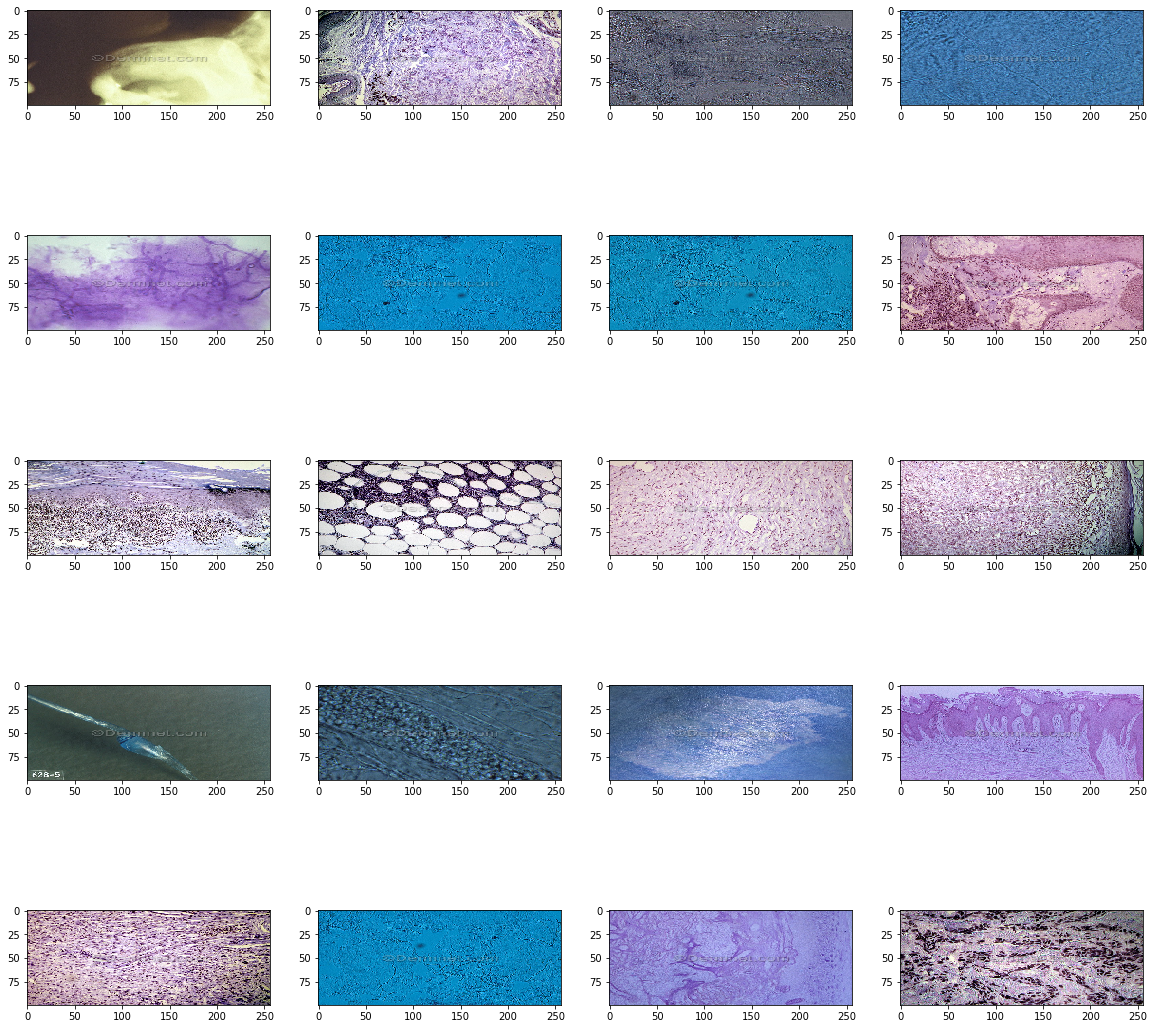

In [ ]:
#anomaly on train dataset
anomaly_image_train = train_df_m1[train_df_m1['image_name'].isin(anomaly_train)][["image_path", "image_name"]].sum(axis=1).sample(20)
col = 4
row = int(len(anomaly_image_train)/4)

multiplot(col, row, anomaly_image_train)

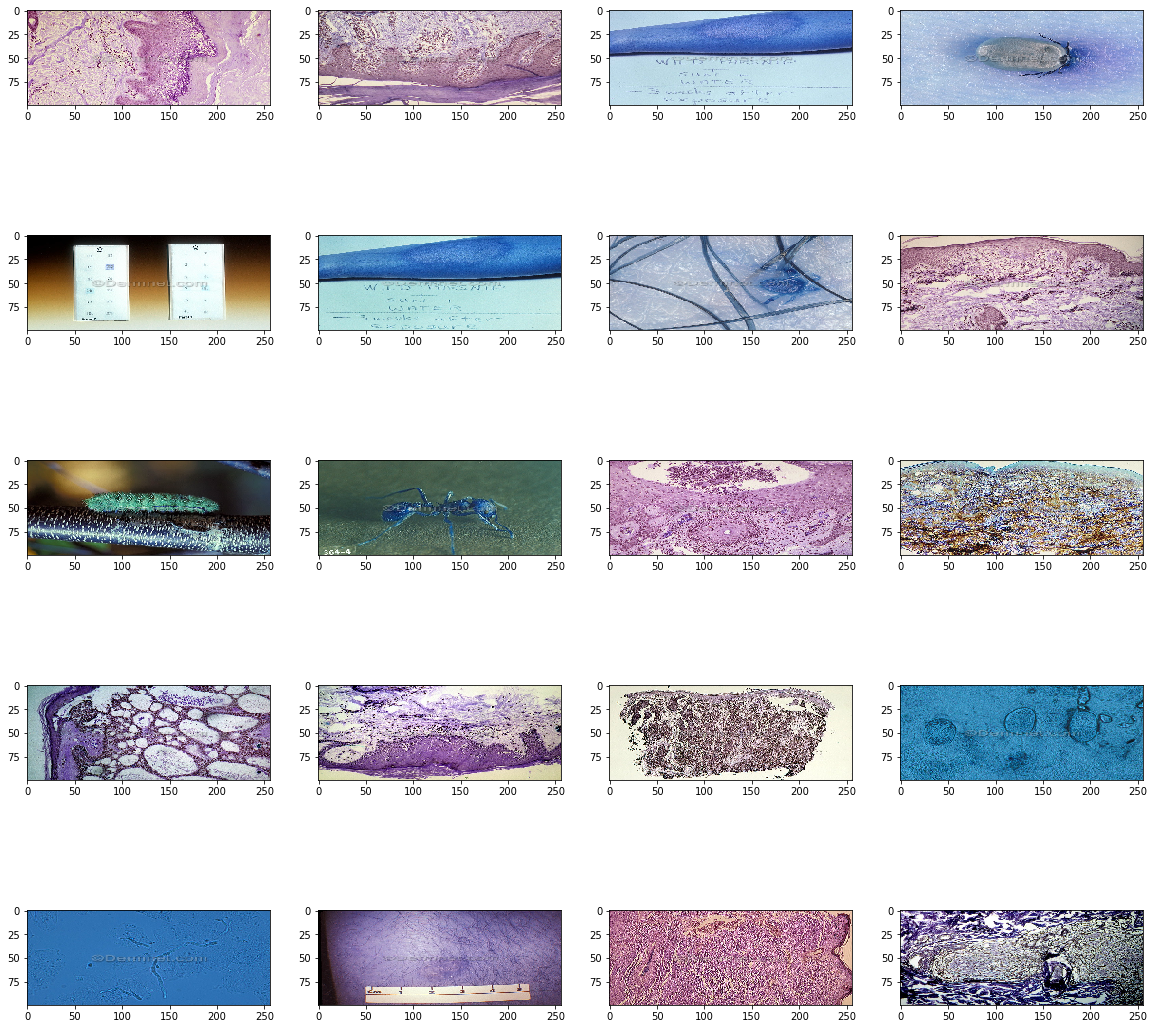

In [ ]:
#anomaly on test dataset
anomaly_image_test = test_df_m1[test_df_m1['image_name'].isin(anomaly_test)][["image_path", "image_name"]].sum(axis=1).sample(20)
col = 4
row = int(len(anomaly_image_test)/4)

multiplot(col, row, anomaly_image_test)

### 2.7 Removal of Anomalies

In [ ]:
#remove the images present in the train and test as anomaly
train_df_m2 = train_df_m1[~train_df_m1['image_name'].isin(anomaly_train)]

#remove the images present in the image set
test_df_m2 = test_df_m1[~test_df_m1['image_name'].isin(anomaly_test)]

In [ ]:
print("Shape of training dataset after removal of anomalies are {}.".format(train_df_m2.shape))
print("Shape of test dataset after removal of anomalies are {}.".format(test_df_m2.shape))

Shape of training dataset after removal of anomalies are (14523, 3).
Shape of test dataset after removal of anomalies are (3527, 3).


### 2.8 Target Label Analysis after removal of duplicate rows and anomalies


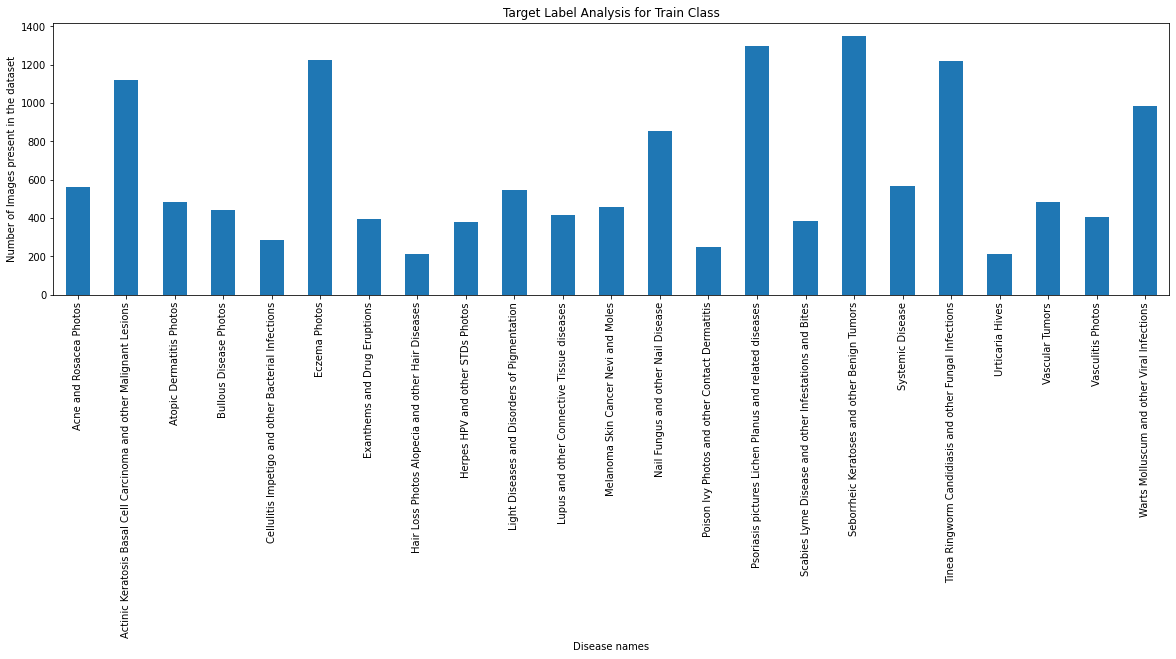

In [ ]:
#getting the frequncy of each label
train_plot = train_df_m2["class"].value_counts().sort_index().plot(kind="bar", 
                                                                xlabel="Disease names",
                                                                ylabel="Number of Images present in the dataset", 
                                                                title="Target Label Analysis for Train Class",
                                                                figsize = (20,5))
plt.show()

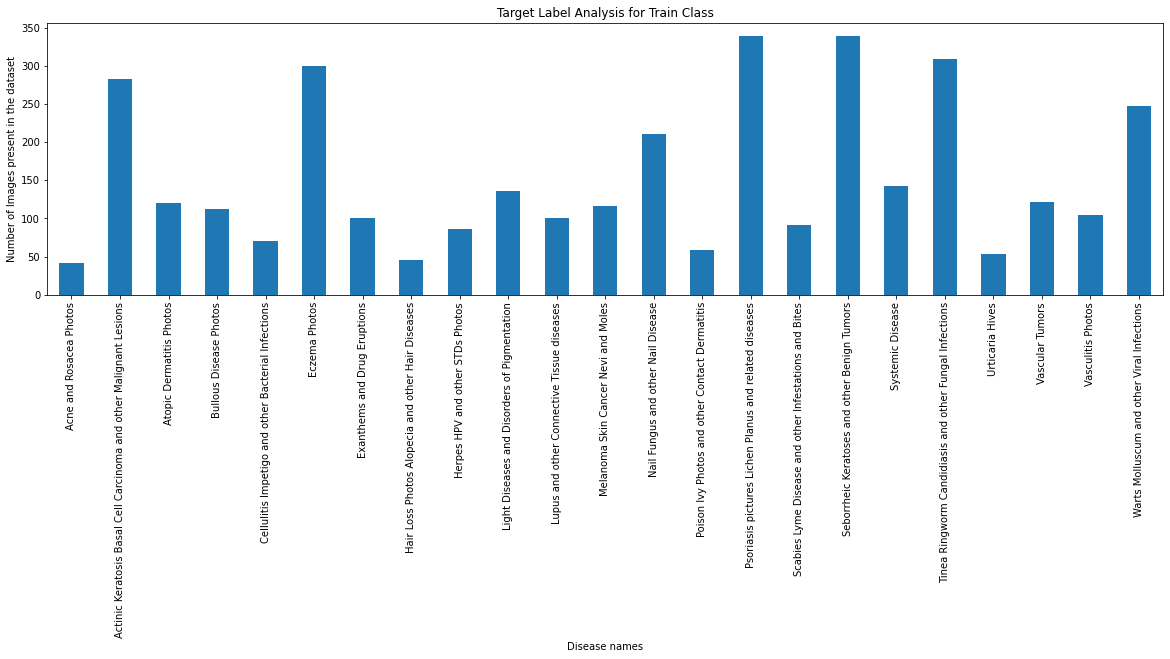

In [ ]:
#getting the frequncy of each label
test_plot = test_df_m2["class"].value_counts().sort_index().plot(kind="bar", 
                                                                xlabel="Disease names",
                                                                ylabel="Number of Images present in the dataset", 
                                                                title="Target Label Analysis for Train Class",
                                                                figsize = (20,5))
plt.show()

In [ ]:
train_df_m2["class"].value_counts()

Seborrheic Keratoses and other Benign Tumors                          1350
Psoriasis pictures Lichen Planus and related diseases                 1297
Eczema Photos                                                         1222
Tinea Ringworm Candidiasis and other Fungal Infections                1218
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions    1118
Warts Molluscum and other Viral Infections                             985
Nail Fungus and other Nail Disease                                     855
Systemic Disease                                                       568
Acne and Rosacea Photos                                                561
Light Diseases and Disorders of Pigmentation                           546
Atopic Dermatitis Photos                                               485
Vascular Tumors                                                        482
Melanoma Skin Cancer Nevi and Moles                                    456
Bullous Disease Photos   

In [ ]:
test_df_m2["class"].value_counts()

Psoriasis pictures Lichen Planus and related diseases                 339
Seborrheic Keratoses and other Benign Tumors                          339
Tinea Ringworm Candidiasis and other Fungal Infections                309
Eczema Photos                                                         300
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions    283
Warts Molluscum and other Viral Infections                            247
Nail Fungus and other Nail Disease                                    210
Systemic Disease                                                      143
Light Diseases and Disorders of Pigmentation                          136
Vascular Tumors                                                       121
Atopic Dermatitis Photos                                              120
Melanoma Skin Cancer Nevi and Moles                                   116
Bullous Disease Photos                                                113
Vasculitis Photos                     

## 3. Image Diversity

### 3.1 Seborrheic Keratoses and other Benign Tumors

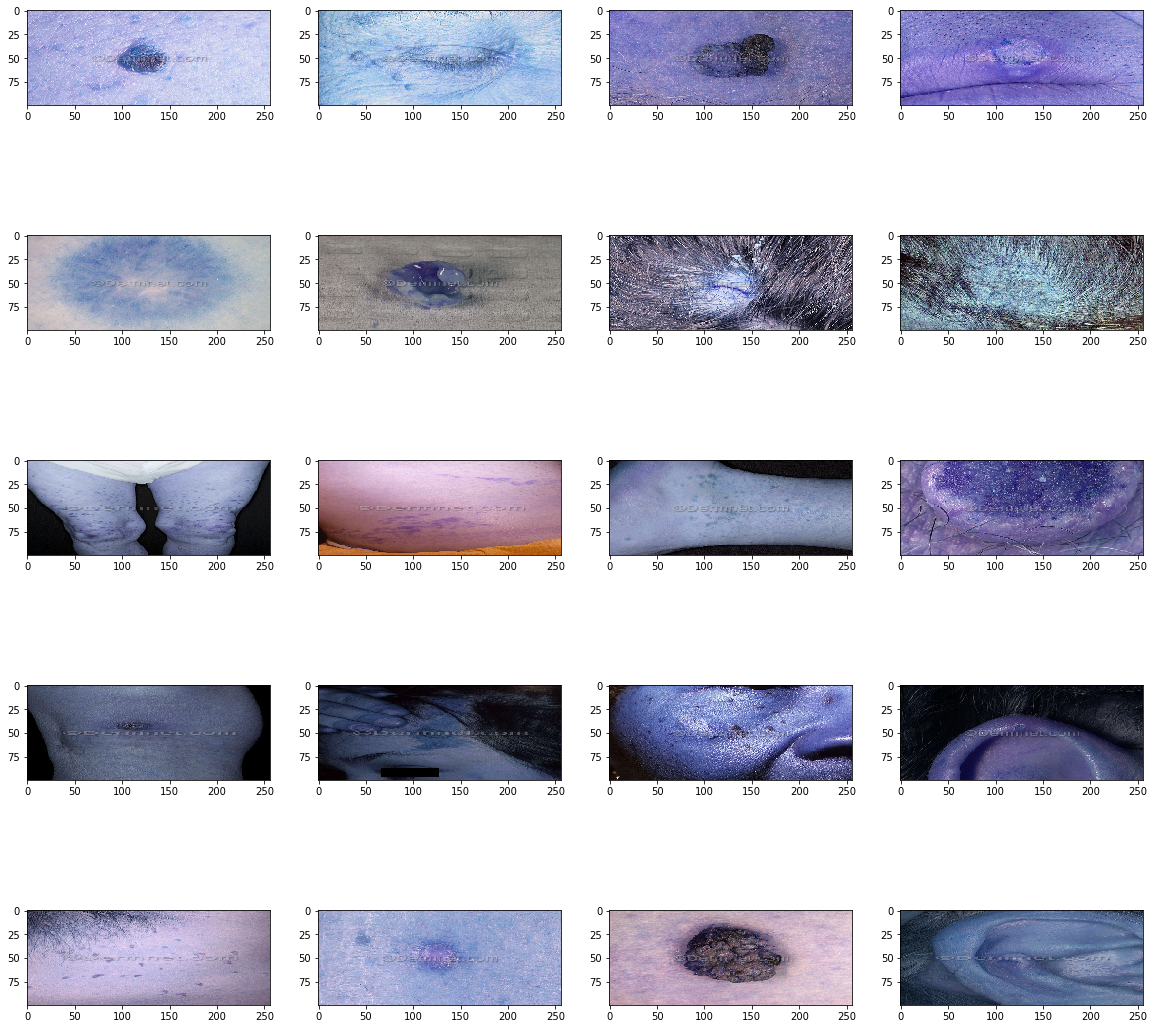

In [ ]:
samples_to_print = train_df_m2[train_df_m2["class"]  == "Seborrheic Keratoses and other Benign Tumors"][["image_path",
                                                                                                         "image_name"]].sum(axis=1).sample(20)
col = 4
row = int(len(samples_to_print)/4)

multiplot(col, row, samples_to_print)                                                                                                        

* From above samples we saw that the folders are highly diversified.

## 4. Final Dataset

In [ ]:
train_df_m2.to_csv("/content/drive/MyDrive/Derment/Files/final_dataframe/final_train_df.csv", index=False)
test_df_m2.to_csv("/content/drive/MyDrive/Derment/Files/final_dataframe/final_test_df.csv", index=False)

In [ ]:
test_df_m2.shape

(3527, 3)